In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


In [5]:
# local impulse in time and space 
stimname = 'gImpulse'
netname = 'recurrent_nn'
dt = 0.001
recurrent_imp_sigG = np.load(f'../output/recurrent_nn/{stimname}/GC_grid_{stimname}.npy')
forward_imp_sigG = np.load(f'../output/forward_nn/{stimname}/GC_grid_{stimname}.npy')
stim_imp = np.load(f'../output/{netname}/{stimname}/stim_grid_{stimname}.npy')
time_imp = np.arange(0,stim_imp.shape[1])*dt

In [6]:
# step in time and space 
stimname = 'gStep'
recurrent_step_sigG = np.load(f'../output/recurrent_nn/{stimname}/GC_grid_{stimname}.npy')
forward_step_sigG = np.load(f'../output/forward_nn/{stimname}/GC_grid_{stimname}.npy')
stim_step = np.load(f'../output/{netname}/{stimname}/stim_grid_{stimname}.npy')
time_step = np.arange(0,stim_step.shape[1])*dt

In [7]:
# plot 
cbar = 'grey'
c1 = 'blue'
c2 = 'red'

fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 3
ms = 60


figsize = (5,6)
image_format = "png"

#initialize figure
nrows = 3
ncols = 2


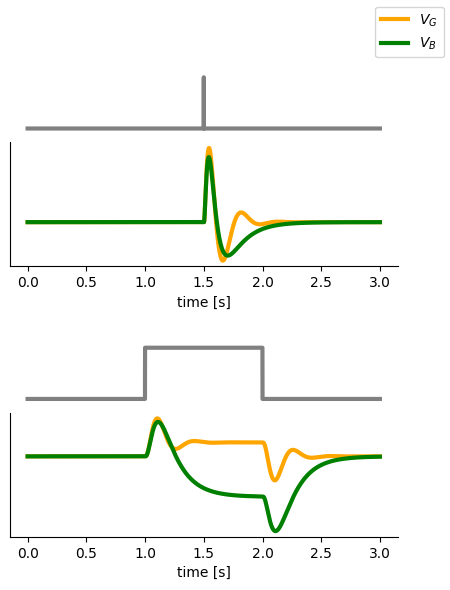

In [14]:
fig = plt.figure(figsize = figsize)
gs = fig.add_gridspec(7,1)


ax = fig.add_subplot(gs[0,0], frameon = False)
ax.set_xticks([])
ax.set_yticks([])
plt.plot(time_imp,stim_imp[206,:], color = cbar,linewidth = lw)


ax = fig.add_subplot(gs[1:3,0])
ax.set_yticks([])
sns.despine(ax = ax)
plt.plot(time_imp,recurrent_imp_sigG[206,:], linewidth = lw, color ='orange', label = '$V_G$')
plt.plot(time_imp,forward_imp_sigG[206,:], color = 'green',linewidth = lw, label = '$V_B$')
ax.set_xlabel('time [s]')



ax = fig.add_subplot(gs[4,0], frameon = False)
ax.set_xticks([])
ax.set_yticks([])
plt.plot(time_step,stim_step[206,:], color =cbar, linewidth = lw)


ax = fig.add_subplot(gs[5:,0])
ax.set_yticks([])
sns.despine(ax = ax)
plt.plot(time_step,recurrent_step_sigG[206,:], color ='orange',linewidth = lw)
plt.plot(time_step,forward_step_sigG[206,:], color = 'green', linewidth = lw)
ax.set_xlabel('time [s]')


fig.legend()
fig.savefig('../plots/Figure_1A.svg')

In [9]:
#  grid with params for fb 

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:

# load df
netname = 'recurrent_nn'
stimname = 'gImpulse'
recurrent_imp_df = pd.read_csv(f'../output/{netname}/{stimname}/grid_frequency.csv')

stimname = 'gStep'
recurrent_step_df = pd.read_csv(f'../output/{netname}/{stimname}/grid_steadystate.csv')
recurrent_step_df['tauAr'] = recurrent_step_df['tauA'].round(3)

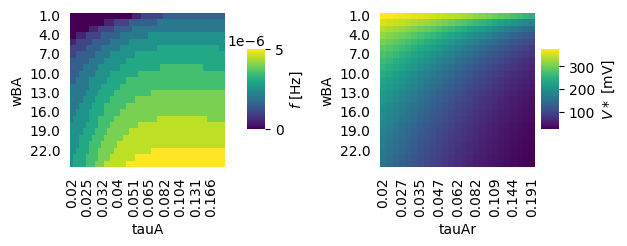

In [13]:
fig = plt.figure(figsize = (6,2))
gs = fig.add_gridspec(1,2)
fig.subplots_adjust(wspace = 1.)


# plot heatmap for impulse frequency
ax = fig.add_subplot(gs[0,0])
df = recurrent_imp_df
cbar_ax = fig.add_axes([.42, .3, .03, .4])
heatmap = df.pivot_table(index = 'wBA',columns = 'tauA',values = 'f', aggfunc = 'mean')
coo = sns.heatmap(heatmap, cmap = 'viridis', ax = ax,  cbar_ax=cbar_ax,cbar_kws={'label': r'$f$ [Hz]'})
ax.tick_params(left=False, bottom=False)




# plot heatmap for step steady state
ax = fig.add_subplot(gs[0,1])
df = recurrent_step_df
cbar_ax = fig.add_axes([.91, .3, .03, .4])
heatmap = df.pivot_table(index = 'wBA',columns = 'tauAr',values = 'VB*', aggfunc = 'mean')
coo = sns.heatmap(heatmap, cmap = 'viridis',ax = ax,  cbar_ax=cbar_ax,cbar_kws={'label': r'$V*$ [mV]'})
ax.tick_params(left=False, bottom=False)



fig.savefig('../plots/Fiure_1B.svg')